In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df_customer_address = pd.read_csv('data/df_customer_address.csv')
df_customer_demographics = pd.read_csv('data/df_customer_demographics.csv')
df_new_customers = pd.read_csv('data/df_new_customers.csv')
df_transactions = pd.read_csv('data/df_transactions.csv')

Text(0.5, 1.0, 'New customers')

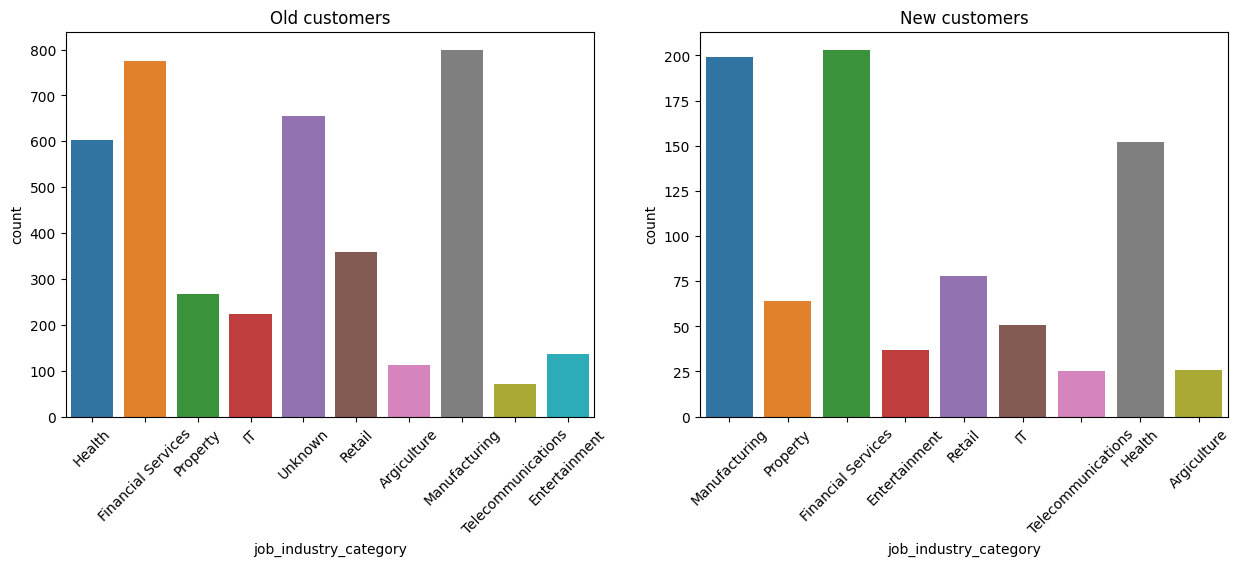

In [19]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.countplot(x='job_industry_category', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.countplot(x='job_industry_category', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('New customers')


<Axes: xlabel='job_industry_category', ylabel='count'>

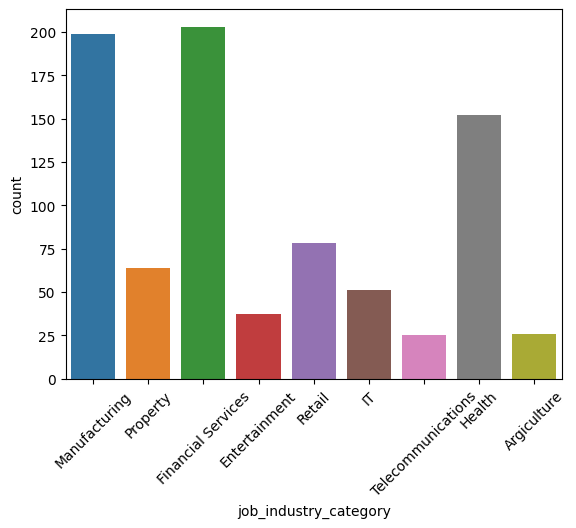

In [27]:
def getAgeGroup(age):
    if(age is np.nan):
        return 'unknown'
    if age < 20:
        return "below20"
    elif 20 <= age < 25:
        return "20-25"
    elif 25 <= age < 30:
        return "25-30"
    elif 30 <= age < 35:
        return "30-45"
    elif 35 <= age < 40:
        return "35-40"
    elif 40 <= age < 45:
        return "40-45"
    elif 45 <= age < 50:
        return "45-50"
    elif 50 <= age < 55:
        return "50-55"
    elif 55 <= age < 60:
        return "55-60"
    else:
        return "60+"


In [28]:
df_customer_demographics['age_group'] = df_customer_demographics['age'].apply(getAgeGroup)

In [29]:
from datetime import datetime, date as dt 
now = dt.today()
df_new_customers['DOB'] = pd.to_datetime(df_new_customers['DOB'], format='mixed', dayfirst= True)    # 1
df_new_customers['year'] = df_new_customers['DOB'].dt.year 
df_new_customers.astype({'year' : 'float64'})
df_new_customers['age'] = (now.year - df_new_customers['year']-5)   # 3

df_new_customers['age_group'] = df_new_customers['age'].apply(getAgeGroup)


Text(0.5, 1.0, 'New customers')

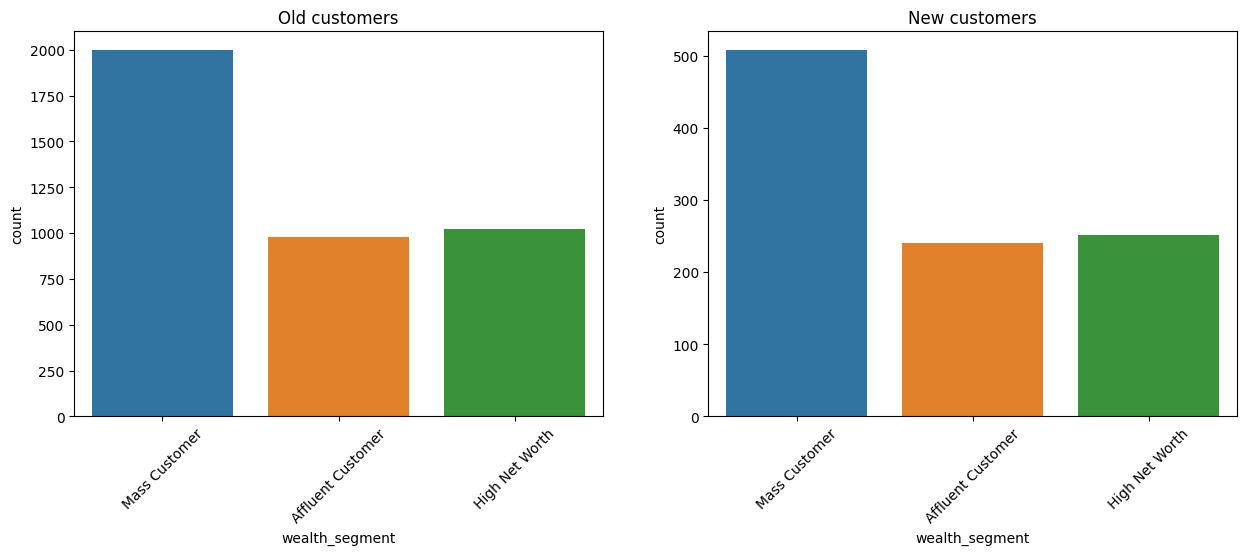

In [30]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.countplot(x='wealth_segment', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.countplot(x='wealth_segment', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('New customers')


Text(0.5, 1.0, 'New customers')

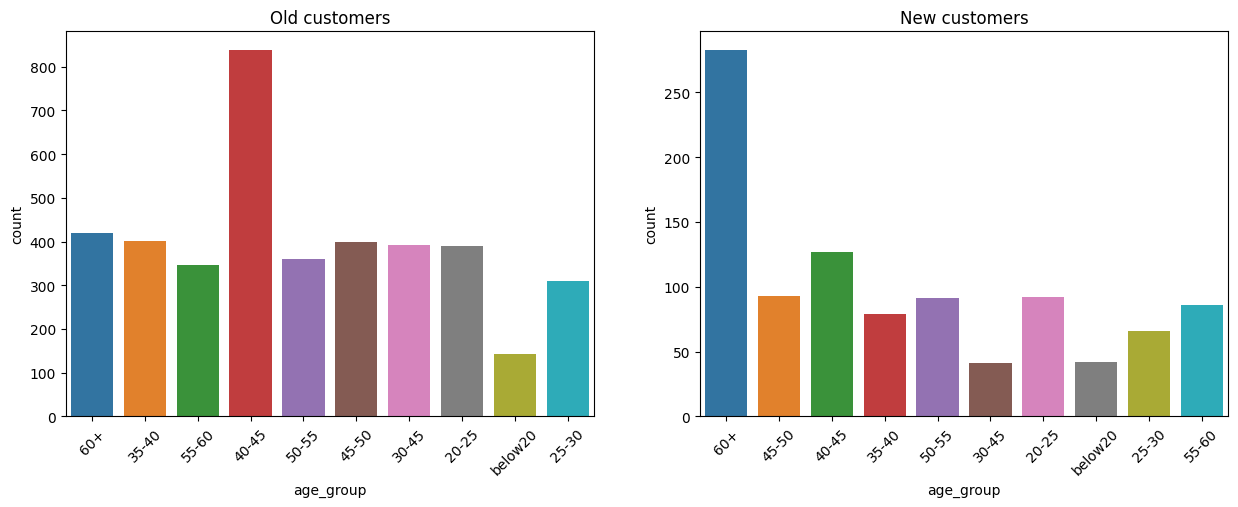

In [31]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.countplot(x='age_group', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.countplot(x='age_group', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('New customers')


Text(0.5, 1.0, 'New customers')

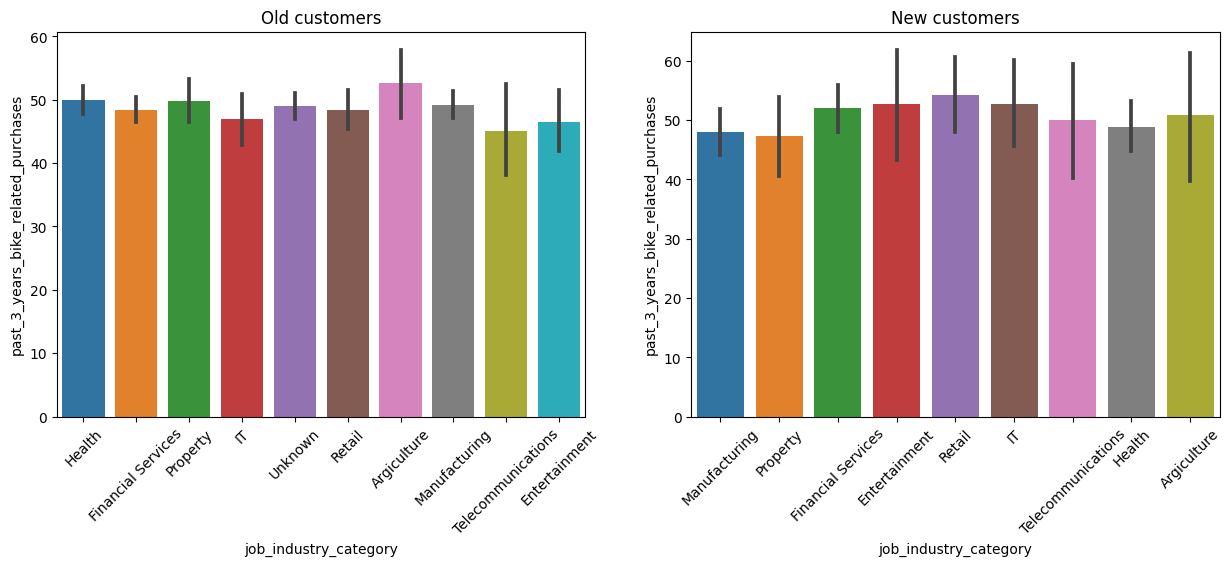

In [35]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
chart1 = sns.barplot(x='job_industry_category', y= 'past_3_years_bike_related_purchases', data=df_customer_demographics)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
chart1.set_title('Old customers')
plt.subplot(1,2,2)
chart2 = sns.barplot(x='job_industry_category', y= 'past_3_years_bike_related_purchases', data=df_new_customers)
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
chart2.set_title('New customers')
